In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
from matplotlib.colors import ListedColormap

In [ ]:
file = open('data/train_features', 'rb')
train_features=pkl.load(file)
file.close()

file = open('data/train_labels', 'rb')
train_labels=pkl.load(file)
file.close()

file = open('data/val_features', 'rb')
val_features=pkl.load(file)
file.close()

file = open('data/val_labels', 'rb')
val_labels=pkl.load(file)
file.close()

file = open('data/pred_labels', 'rb')
pred_labels=pkl.load(file)
file.close()

file = open('data/opt_params', 'rb')
opt_params=pkl.load(file)
file.close()

file = open('data/loss_history', 'rb')
loss_history=pkl.load(file)
file.close()

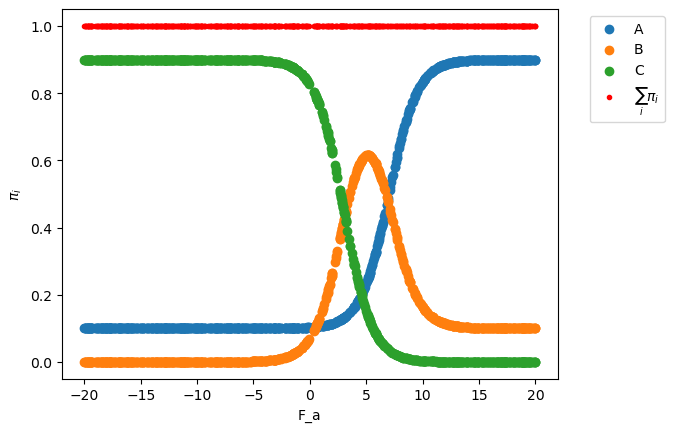

In [36]:
label=['A', 'B', 'C']
for i, species_labels in enumerate(train_labels.T):
    plt.scatter(train_features, species_labels, label=f'{label[i]}')
plt.scatter(train_features, np.sum(train_labels, axis=1), color='r', marker='.', label=r'$\sum_i \pi_i$')
plt.xlabel('F_a')
plt.ylabel(r'$\pi_i$')
plt.legend(bbox_to_anchor=[1.05, 1], loc='upper left')



Text(0, 0.5, 'F_a2_in')

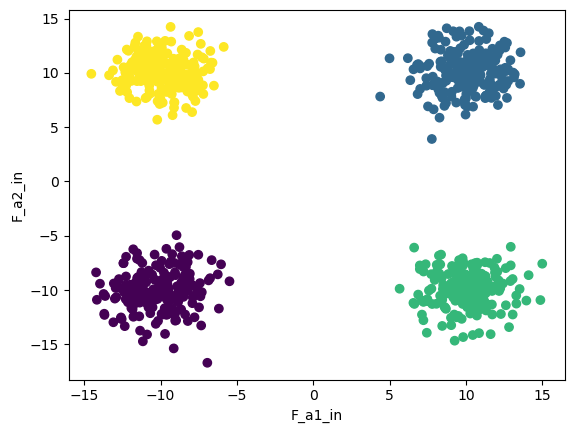

In [16]:
cmap = plt.colormaps['Pastel1']
colors={}
counter=0
color_order=[]
for label in train_labels:
    if tuple(label.tolist()) not in colors.keys():
        colors[tuple(label.tolist())]=counter
        counter+=1
    color_order.append(colors[tuple(label.tolist())])

plt.scatter(train_features.T[0], train_features.T[1], c=color_order)
plt.xlabel('F_a1_in')
plt.ylabel('F_a2_in')

Text(0.5, 1.0, 'Training Loss History')

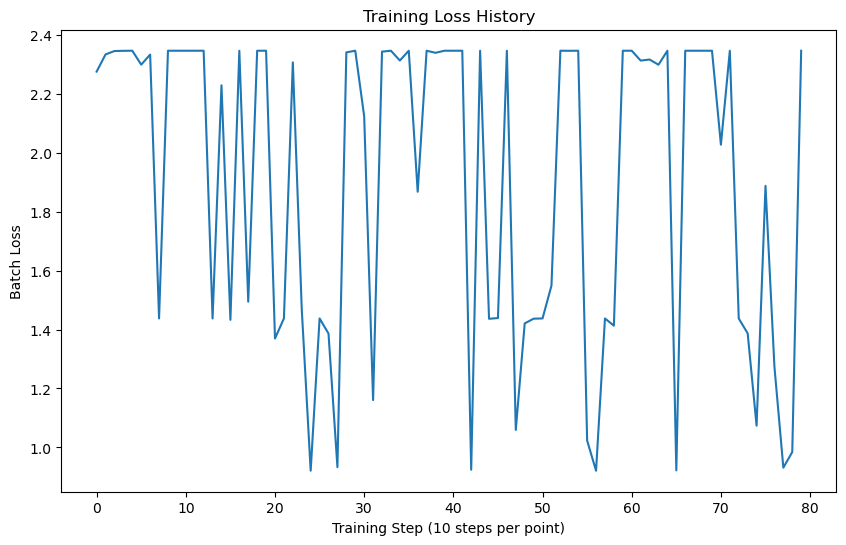

In [37]:
# Plot loss history
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.xlabel('Training Step (10 steps per point)')
plt.ylabel('Batch Loss')
plt.title('Training Loss History')
#plt.savefig('data/loss_history.png')  

NameError: name 'pred_labels' is not defined

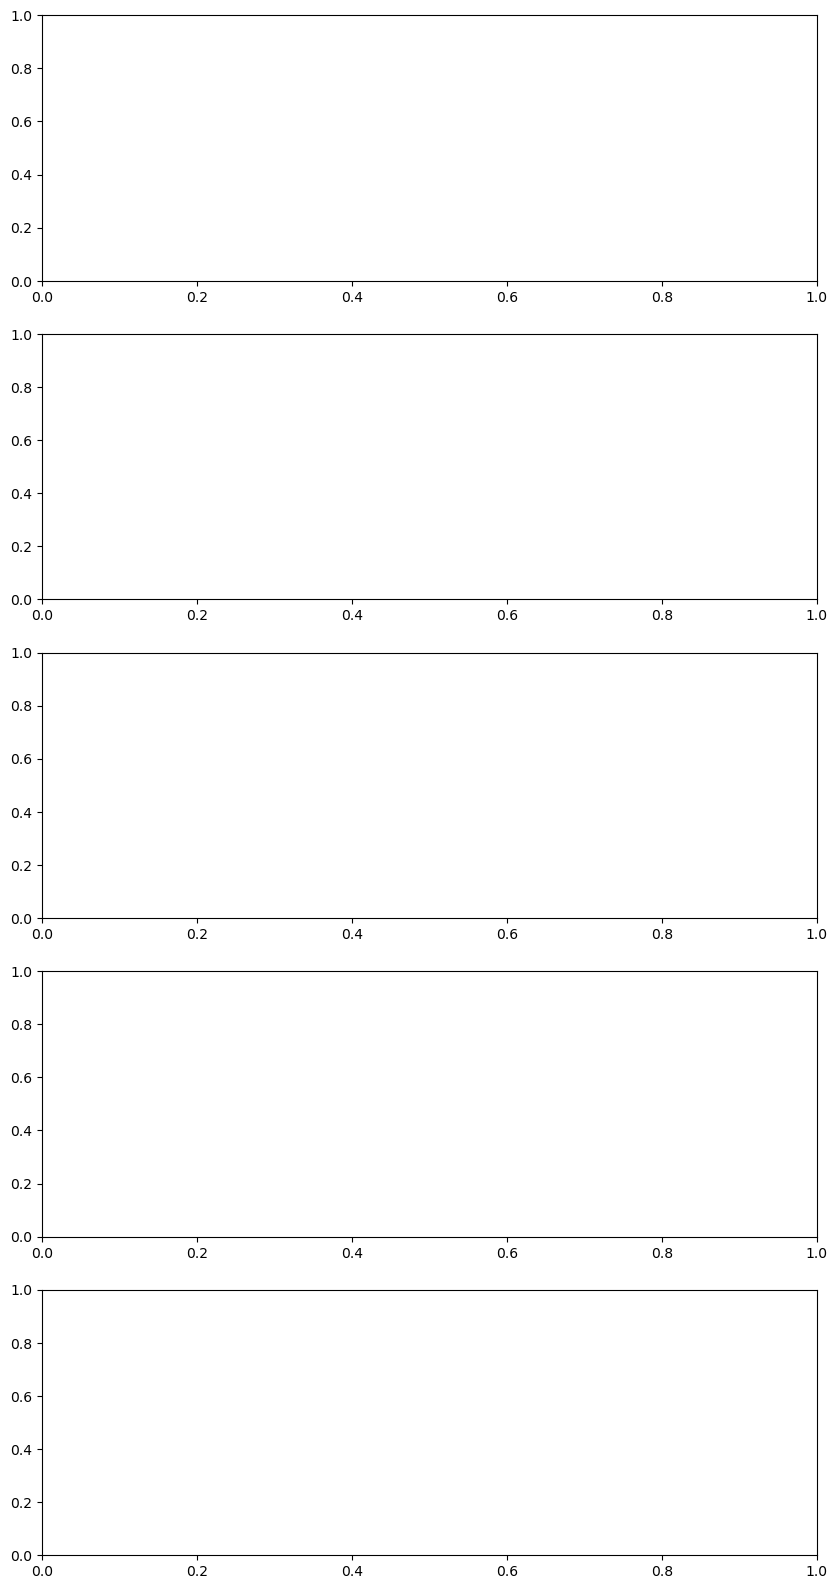

In [38]:
 # Plot a few example predictions
n_examples = min(5, len(val_features))
fig, axes = plt.subplots(n_examples, 1, figsize=(10, 4*n_examples))
    
if n_examples == 1:
    axes = [axes]
        
for i in range(n_examples):
    true_conc = val_labels[i]
    pred_conc = pred_labels[i]
        
    species = ['A', 'B', 'C']#['W', 'WE1', 'W_star', 'W_star_E2', 'E1', 'E2']
        
    axes[i].bar(species, true_conc, alpha=0.7, label='True')
    axes[i].bar(species, pred_conc, alpha=0.5, label='Predicted')
    axes[i].set_ylabel('Concentration')
    axes[i].set_title(f'Example {i+1}: Feature = {val_features[i]}')
    axes[i].legend()
    
plt.tight_layout()
    